# <font color='orange'> Problem Description </font>

#### Statement:
Identify potential fraud credit card applications.

#### Dataset Description
This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

9.  Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


# <font color='green'> Proposed Solution </font>

#### Proposed model: 
Self organising Maps (SOMs). 
The implementation uses implementation of SOM from the minisom package (https://pypi.org/project/SimpSOM/).

#### Null Hypothesis:
Fraudulent transactions are the outliers in the dataset, i.e., the attributes values do not follow the 'average normal' trend that fraudulent transactions follow.

Assuming null hypothesis to be true, outliers in the dataset will be marked as frauds. Further investigation would be required to possibly find examples that support the alternate hypothesis.

# <font color='blue'>Formulating the solution</font>

### 1. Loading dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
df.shape

(690, 16)

In [4]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
df.tail()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


In [6]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

#### <font color='red'>Gist:</font> 
No missing values<br>

### 2. EDA

In [7]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [9]:
df.Class.head()

0    0
1    0
2    0
3    1
4    1
Name: Class, dtype: int64

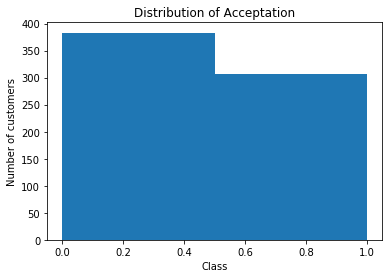

In [18]:
plt.hist(df['Class'].values, bins=2)
plt.title('Distribution of Acceptation')
plt.xlabel('Class')
plt.ylabel('Number of customers')
plt.show()

#### <font color='red'>Gist:</font> 
The number of accepted and rejected applications are relatively not too different.<br>